In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style="darkgrid")
from matplotlib import gridspec
import matplotlib.cm as cm

#### Plot line curve and histogram jointly

In [ ]:
## Mockup data
num_samples = 1000
x = 0.15 * np.random.randn(num_samples)
t = np.arange(num_samples)

In [106]:
raw = np.load('random_data/lidar_0.npy')
num_samples, num_channels = raw.shape
X = raw[:, :]
t = np.arange(num_samples)

In [129]:
colors = cm.inferno(np.linspace(0, 1, num_channels))

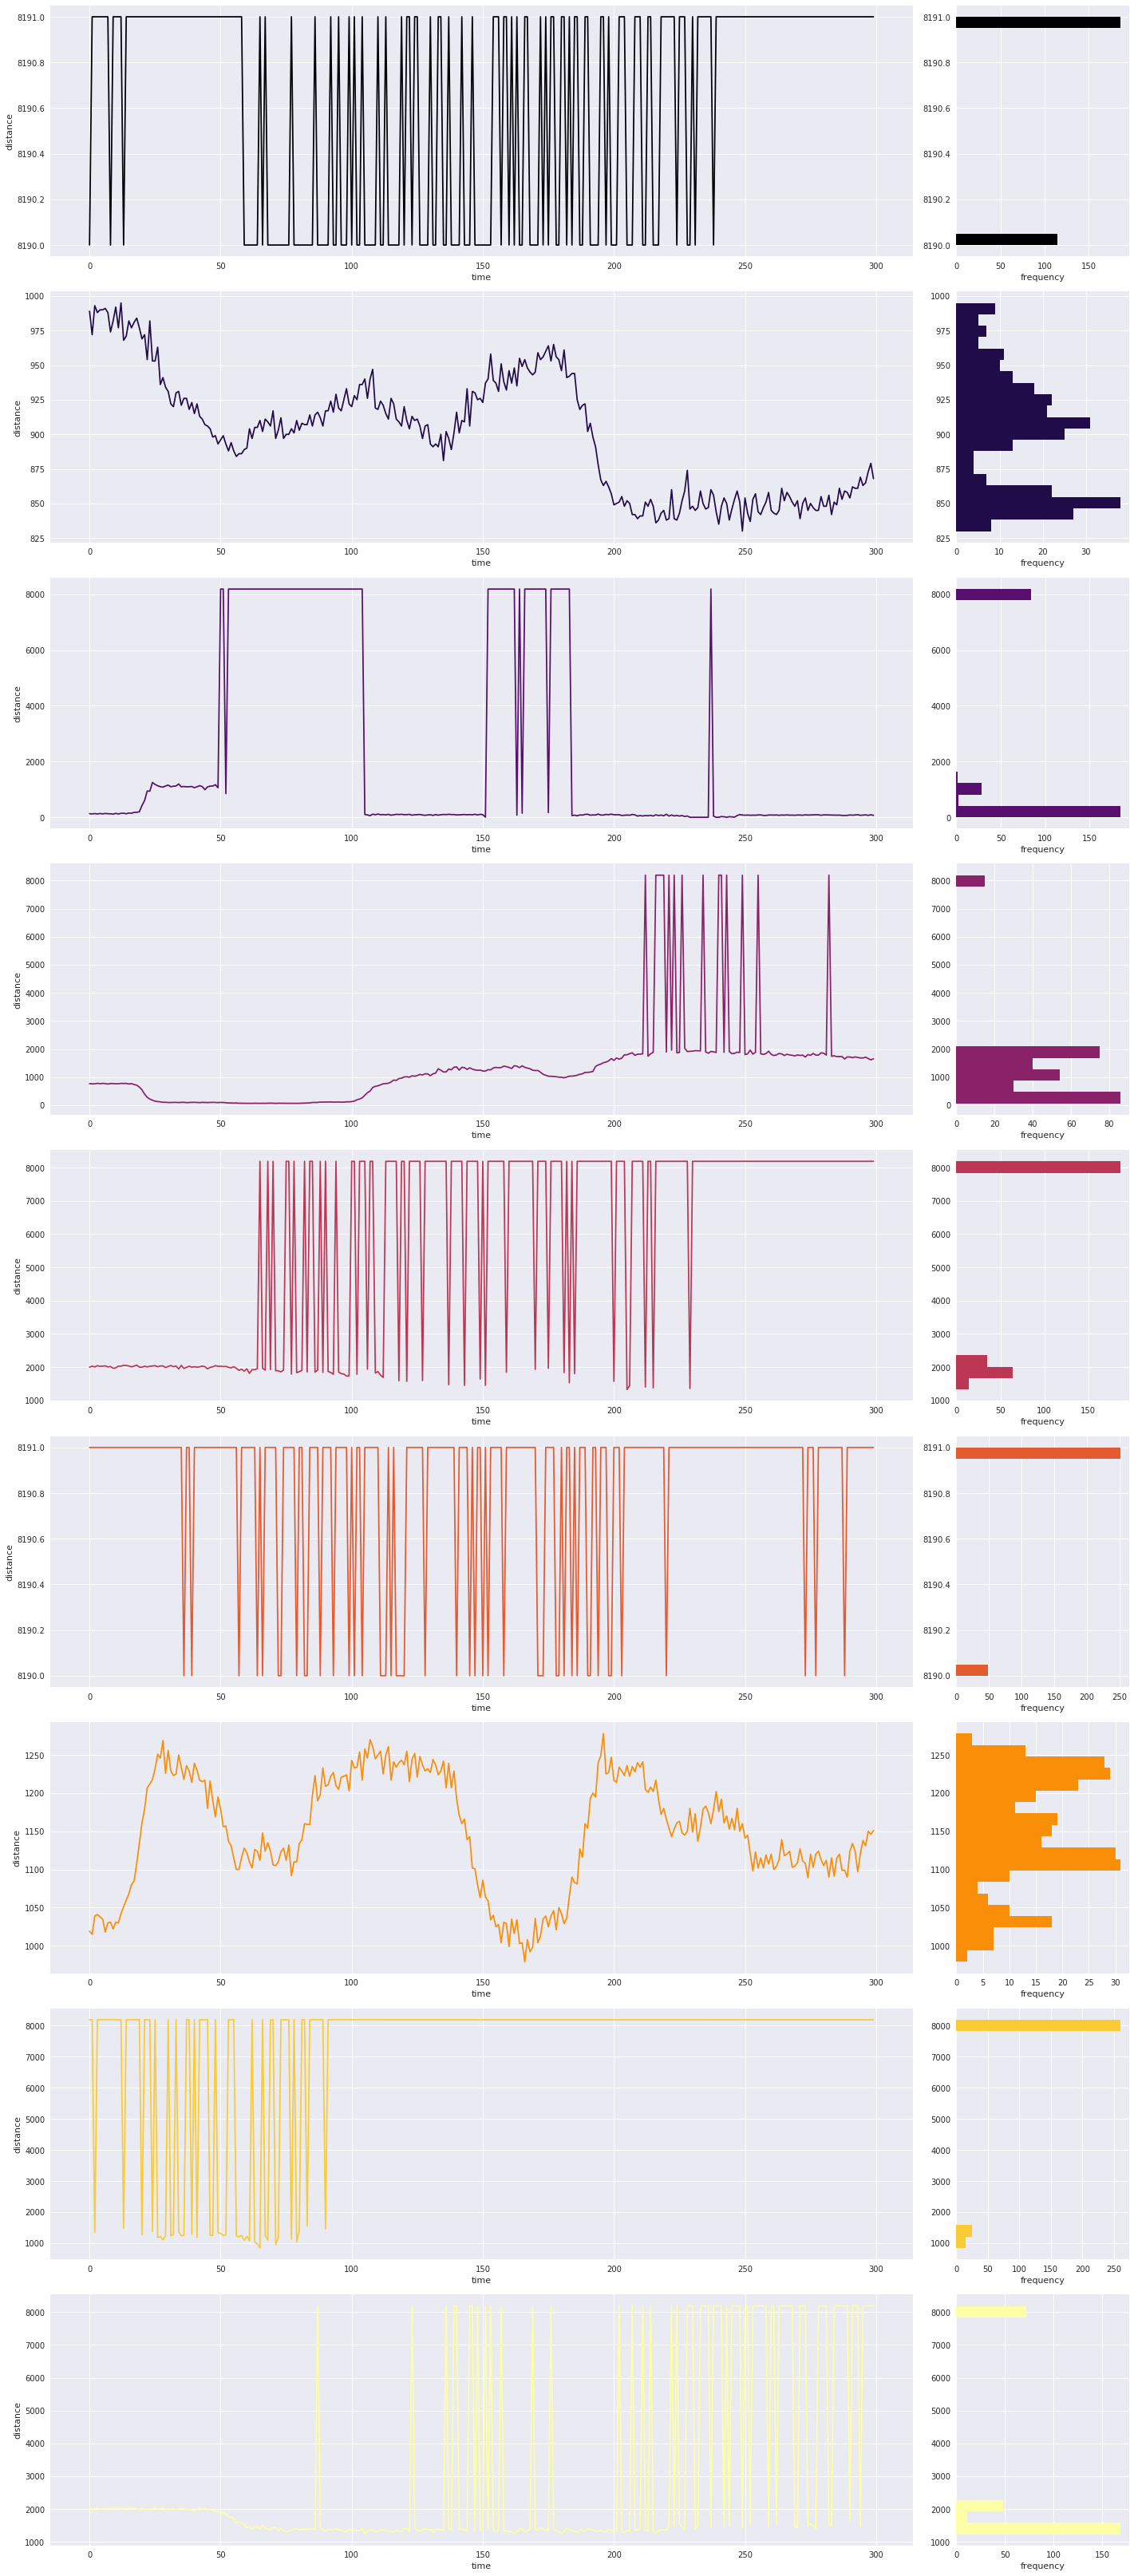

In [132]:
fig = plt.figure(figsize=(20, 5*num_channels))

for idx in range(num_channels):
    x = idx % num_channels
    y = idx % 1
    gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
    ax0 = plt.subplot(gs[x, y])
    plt.xlabel('time')
    plt.ylabel('distance')
    ax0.plot(t, X[:, idx], color=colors[idx])
    
    ax1 = plt.subplot(gs[x, y+1])
    vert_hist = np.histogram(X[:, idx])
    ax1.hist(X[:, idx], bins=20, orientation="horizontal", color=colors[idx]);
    plt.xlabel('frequency')
plt.tight_layout()